# 1) Delivery_time -> Predict delivery time using sorting time 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\Harshal\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("D:\ExcelR\Assignment SLR\delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df.rename(columns={'Delivery Time': 'Delivery_Time'}, inplace=True)
df.rename(columns={'Sorting Time': 'Sorting_Time'}, inplace=True)

In [4]:
df.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
df.duplicated().sum()

0

In [14]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

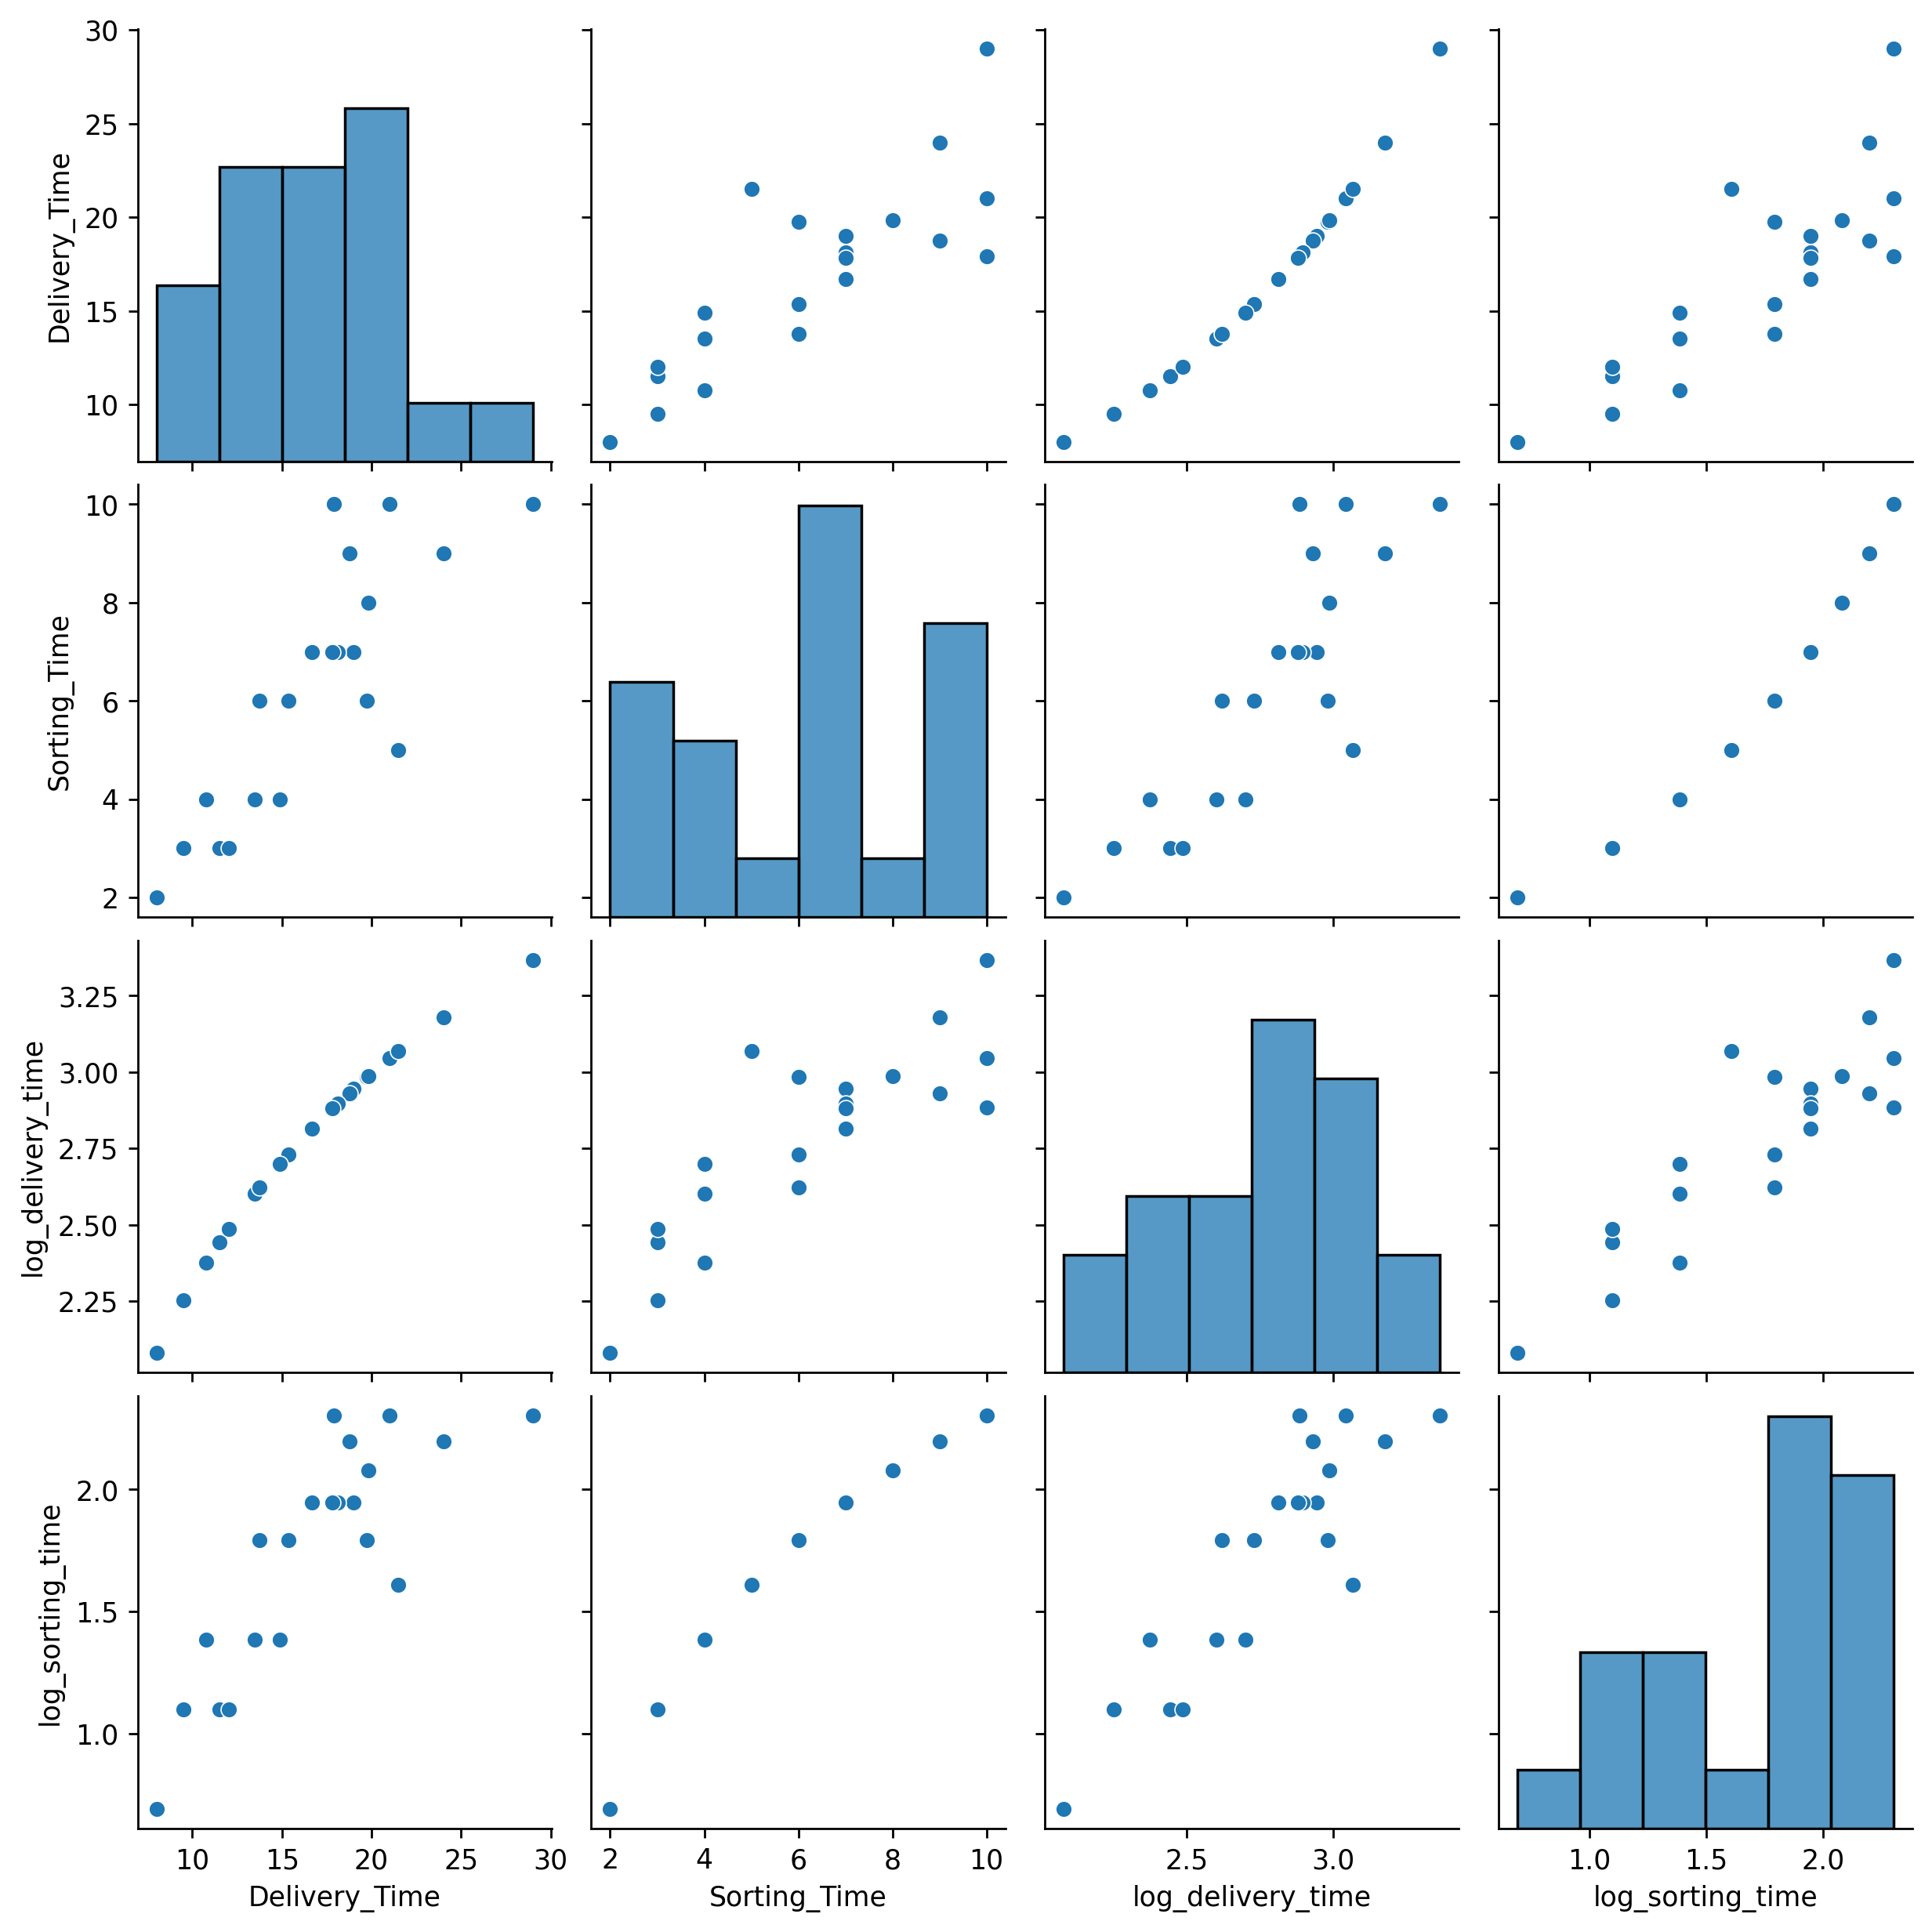

In [15]:
sns.pairplot(df)

<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

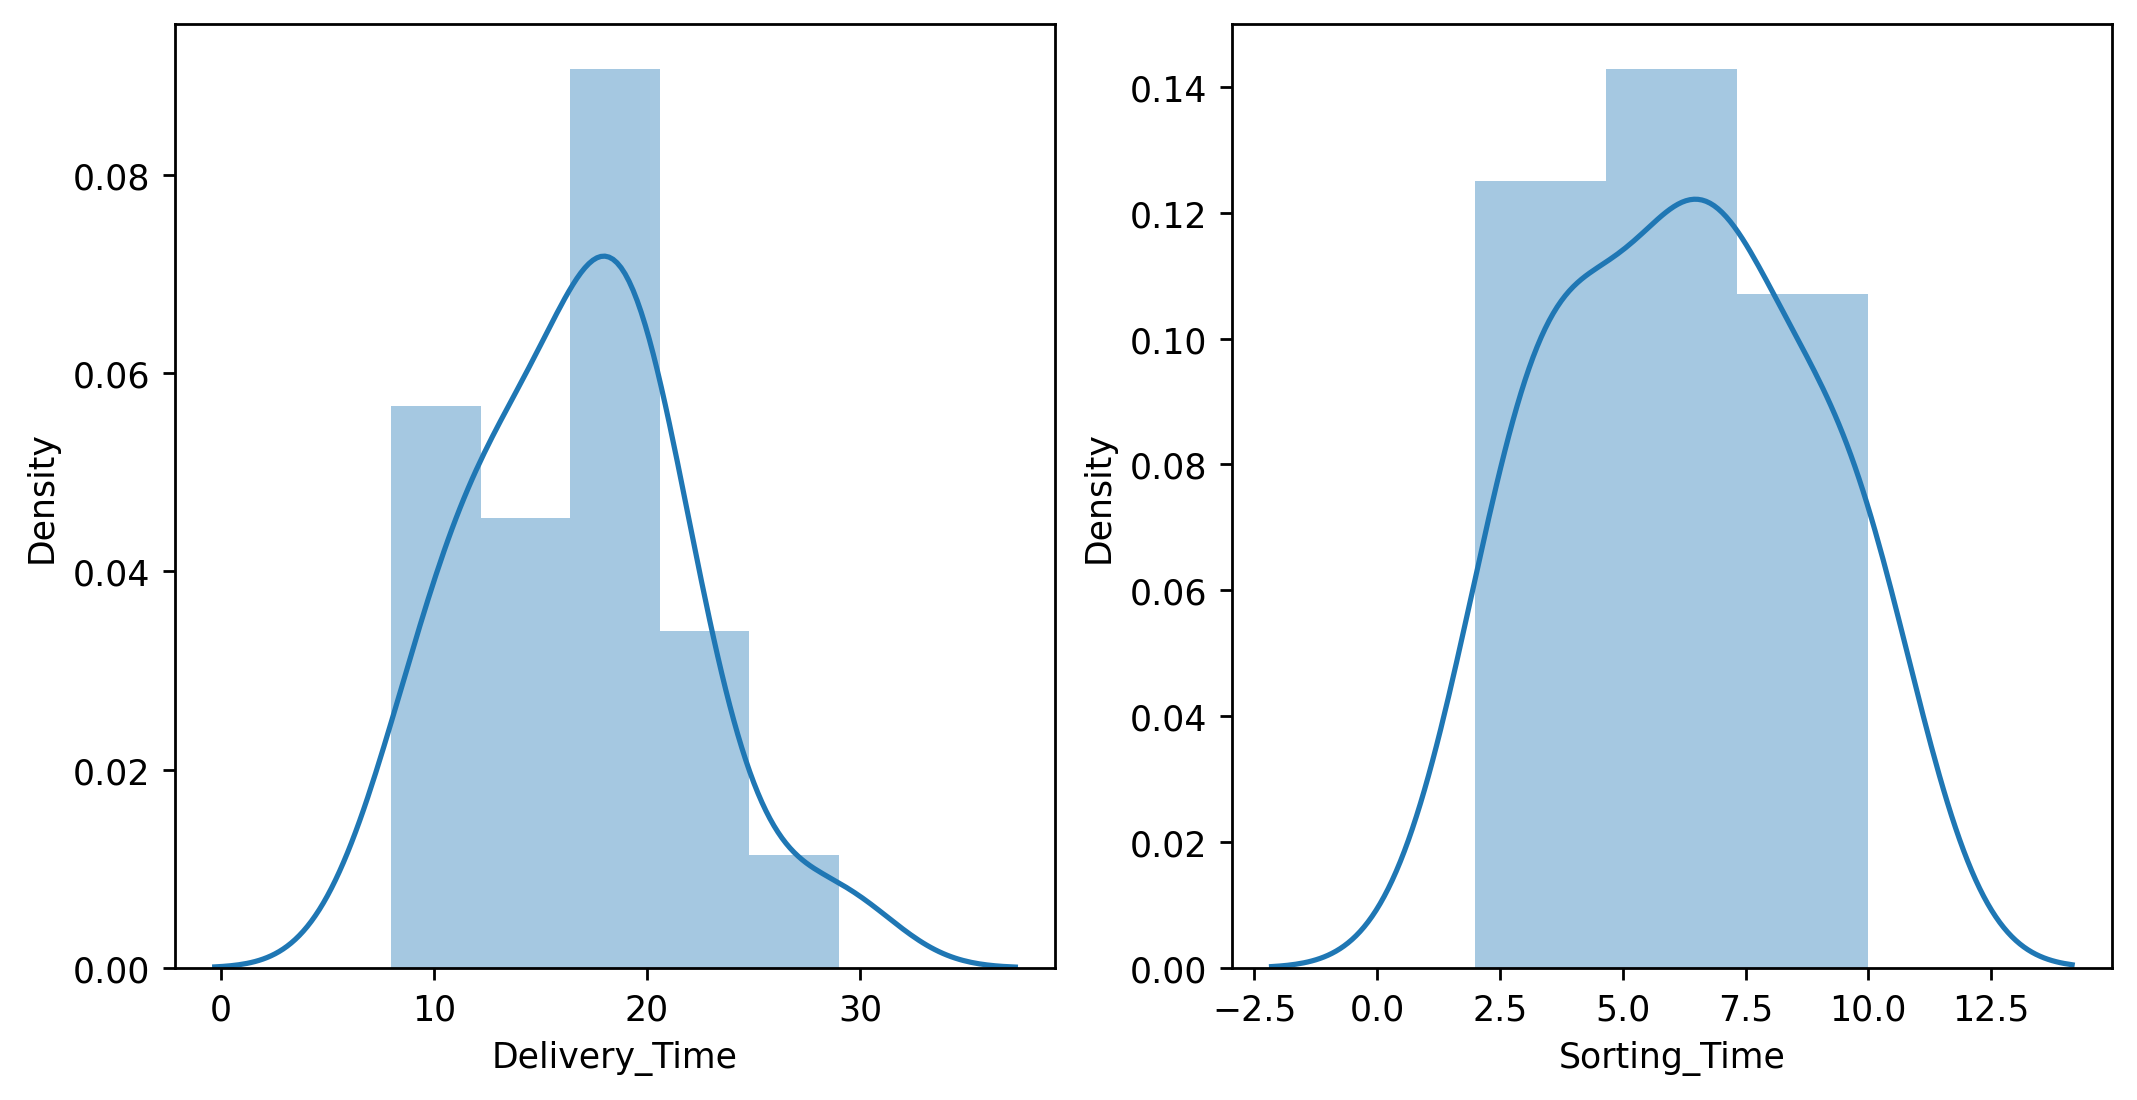

In [16]:
plt.subplot(1,2,1)
sns.distplot(df['Delivery_Time'])

plt.subplot(1,2,2)
sns.distplot(df['Sorting_Time'])

<AxesSubplot:>

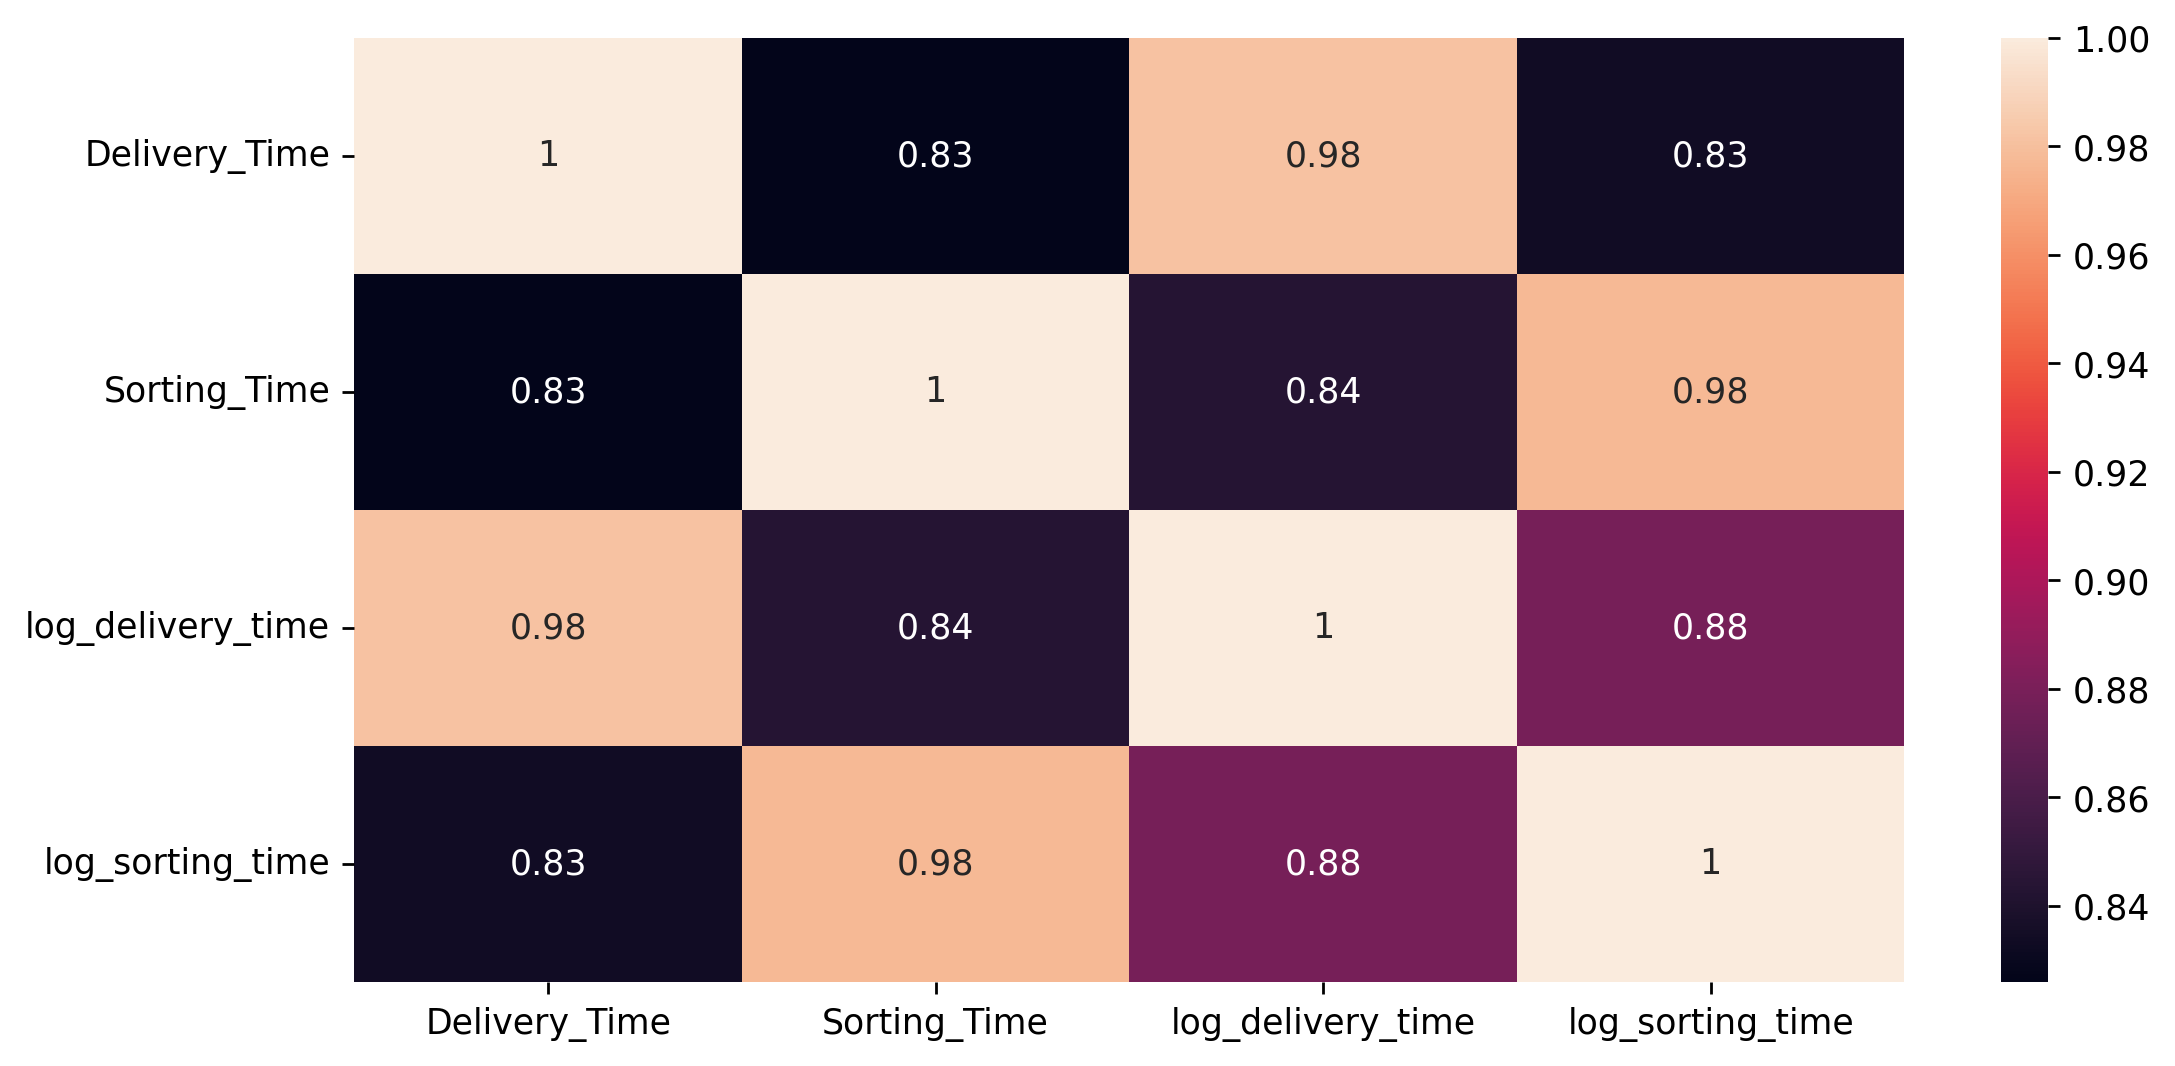

In [17]:
sns.heatmap(df.corr(), annot = True)

In [11]:
# Log Transformation

df['log_delivery_time'] = np.log(df['Delivery_Time'])
df['log_sorting_time'] = np.log(df['Sorting_Time'])

<AxesSubplot:xlabel='log_sorting_time', ylabel='Density'>

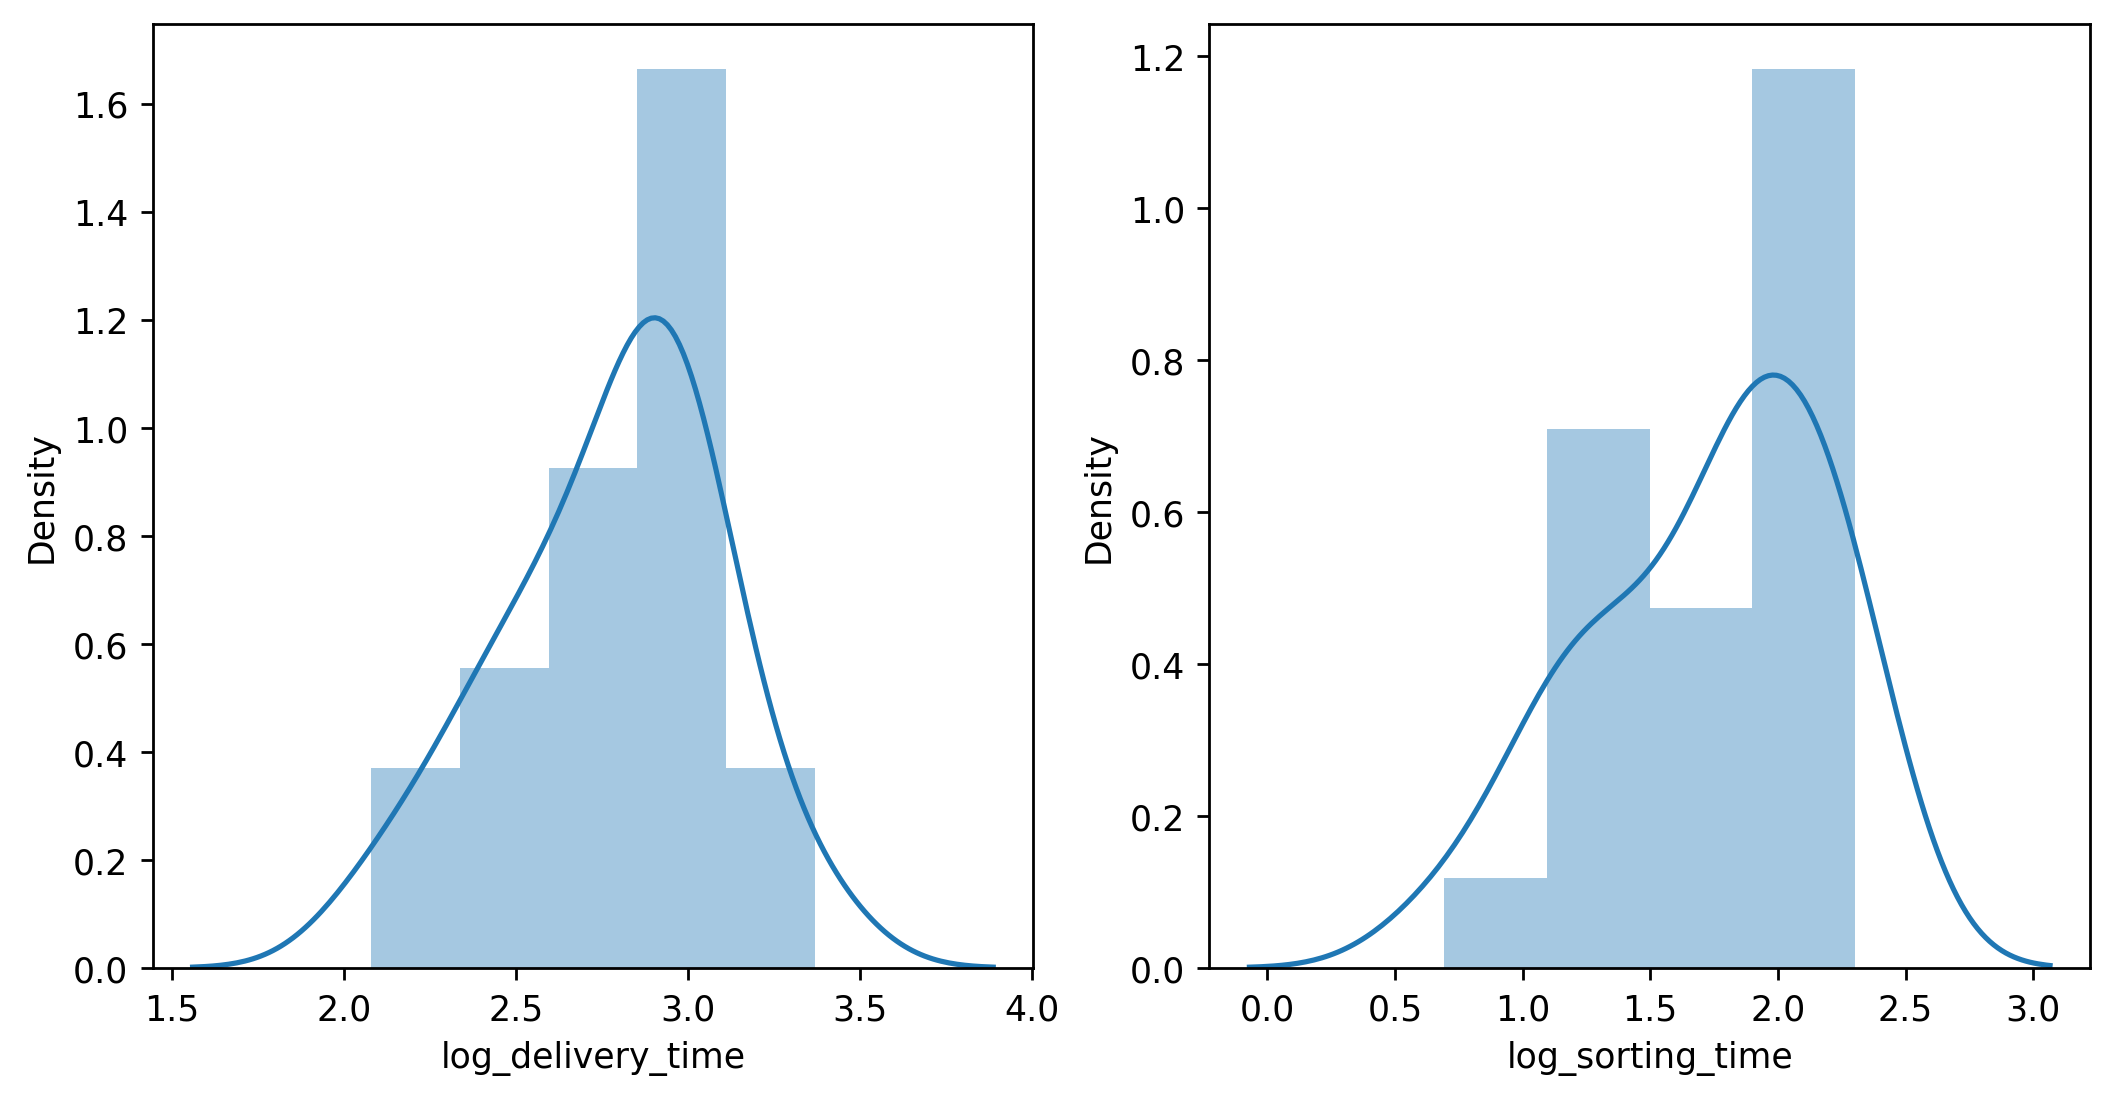

In [18]:
plt.subplot(1,2,1)
sns.distplot(df['log_delivery_time'])

plt.subplot(1,2,2)
sns.distplot(df['log_sorting_time'])

In [19]:
import statsmodels.formula.api as smf

In [20]:
model = smf.ols('Delivery_Time~Sorting_Time', data=df).fit()
model

In [21]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [22]:
model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [23]:
log_model = smf.ols('log_delivery_time~log_sorting_time',data=df).fit()

In [24]:
log_model.params

Intercept           1.741987
log_sorting_time    0.597522
dtype: float64

In [25]:
log_model.rsquared, log_model.rsquared_adj

(0.77216134926874, 0.7601698413355158)

In [27]:
df['sqrt_delivery_time'] = np.sqrt(df['Delivery_Time'])
df['sqrt_sorting_time'] = np.sqrt(df['Sorting_Time'])

<AxesSubplot:xlabel='sqrt_sorting_time', ylabel='Density'>

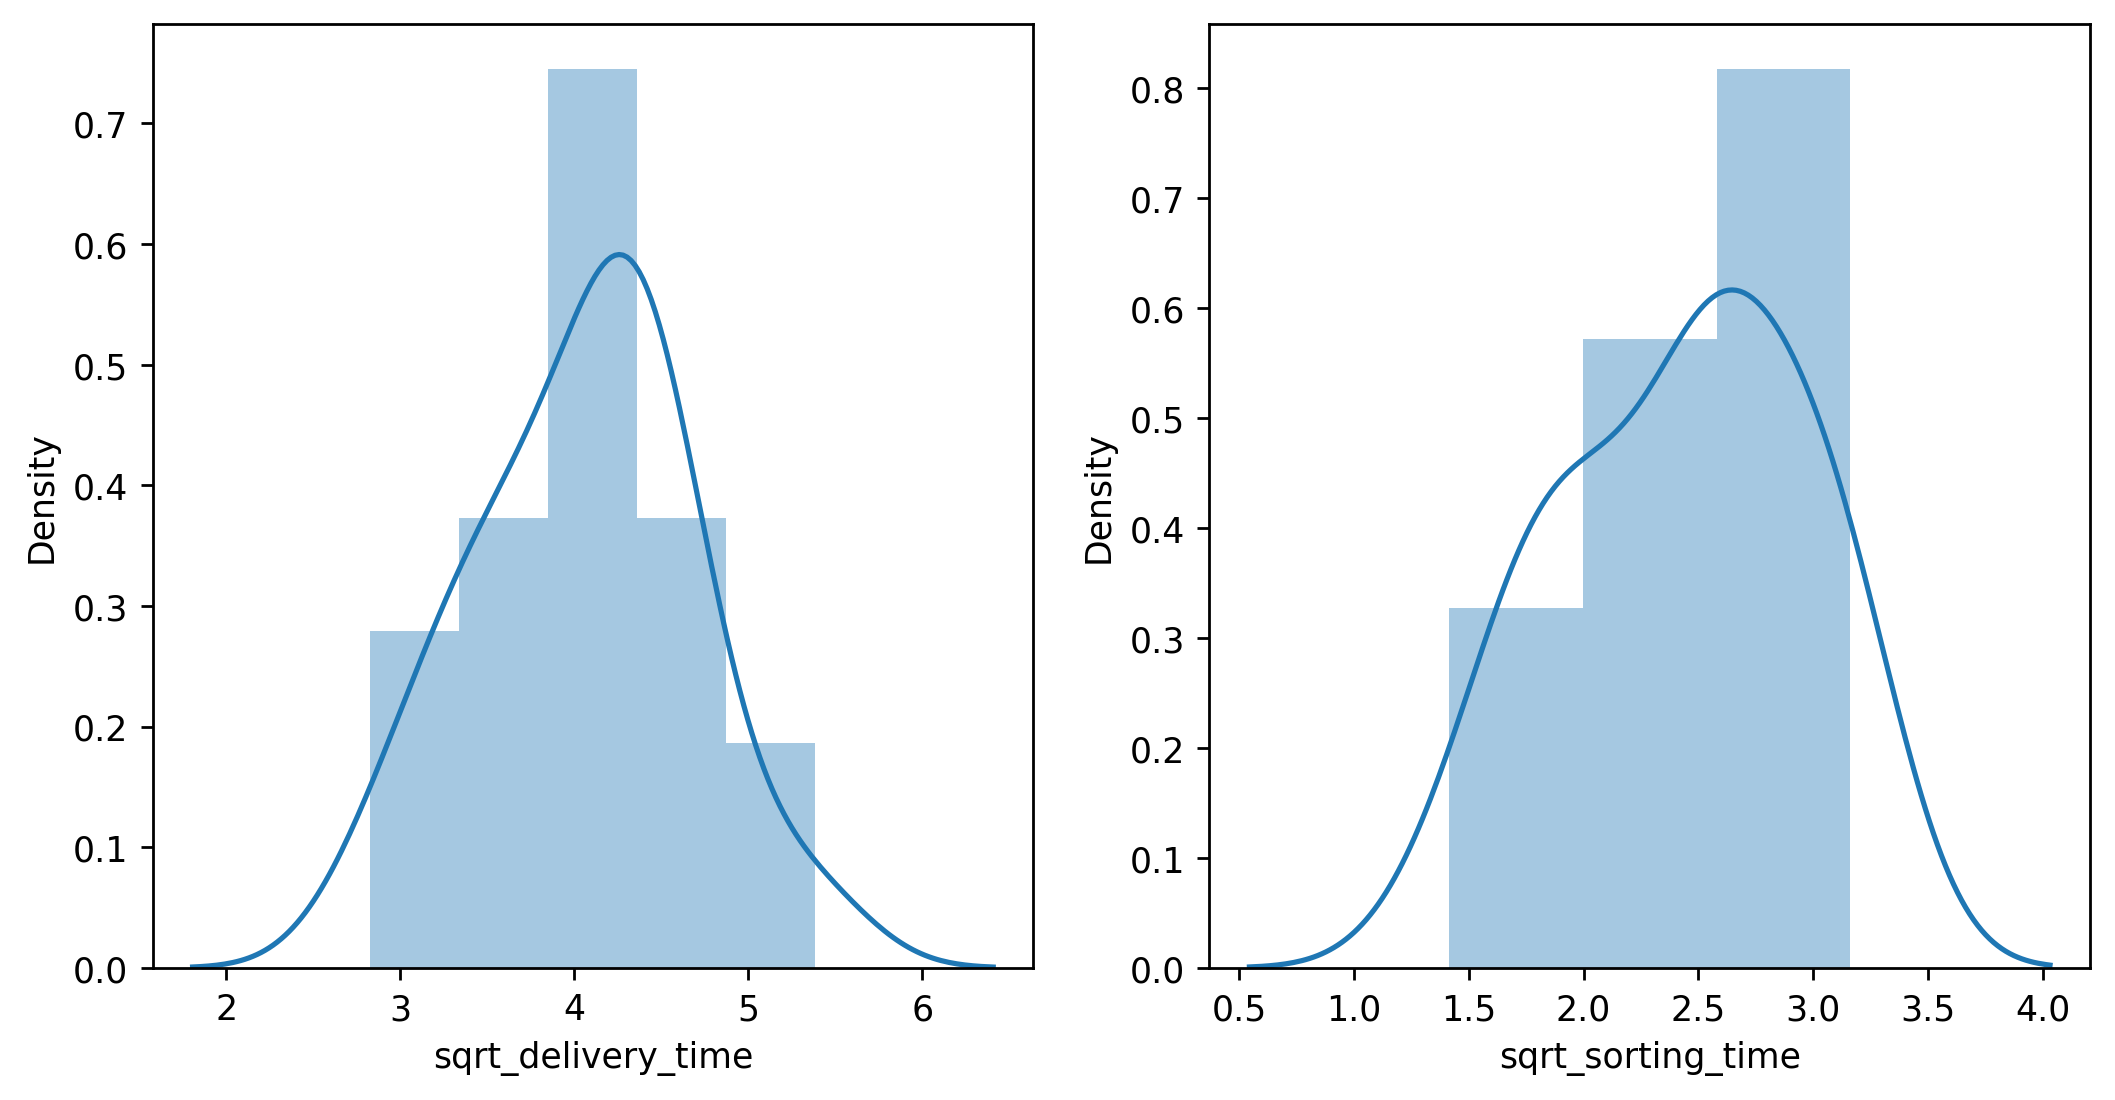

In [43]:
plt.subplot(1,2,1)
sns.distplot(df['sqrt_delivery_time'])

plt.subplot(1,2,2)
sns.distplot(df['sqrt_sorting_time'])

In [28]:
sqrt_model = smf.ols('sqrt_delivery_time~sqrt_sorting_time',data=df).fit()

In [29]:
sqrt_model.params

Intercept            1.613479
sqrt_sorting_time    1.002217
dtype: float64

In [30]:
sqrt_model.rsquared, sqrt_model.rsquared_adj

(0.7292011987544664, 0.7149486302678594)

# 2) Salary_hike -> Build a prediction model for Salary_hike

In [32]:
df1 = pd.read_csv("D:\ExcelR\Assignment SLR\Salary_Data.csv")
df1

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [33]:
df1.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [35]:
df1.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<AxesSubplot:>

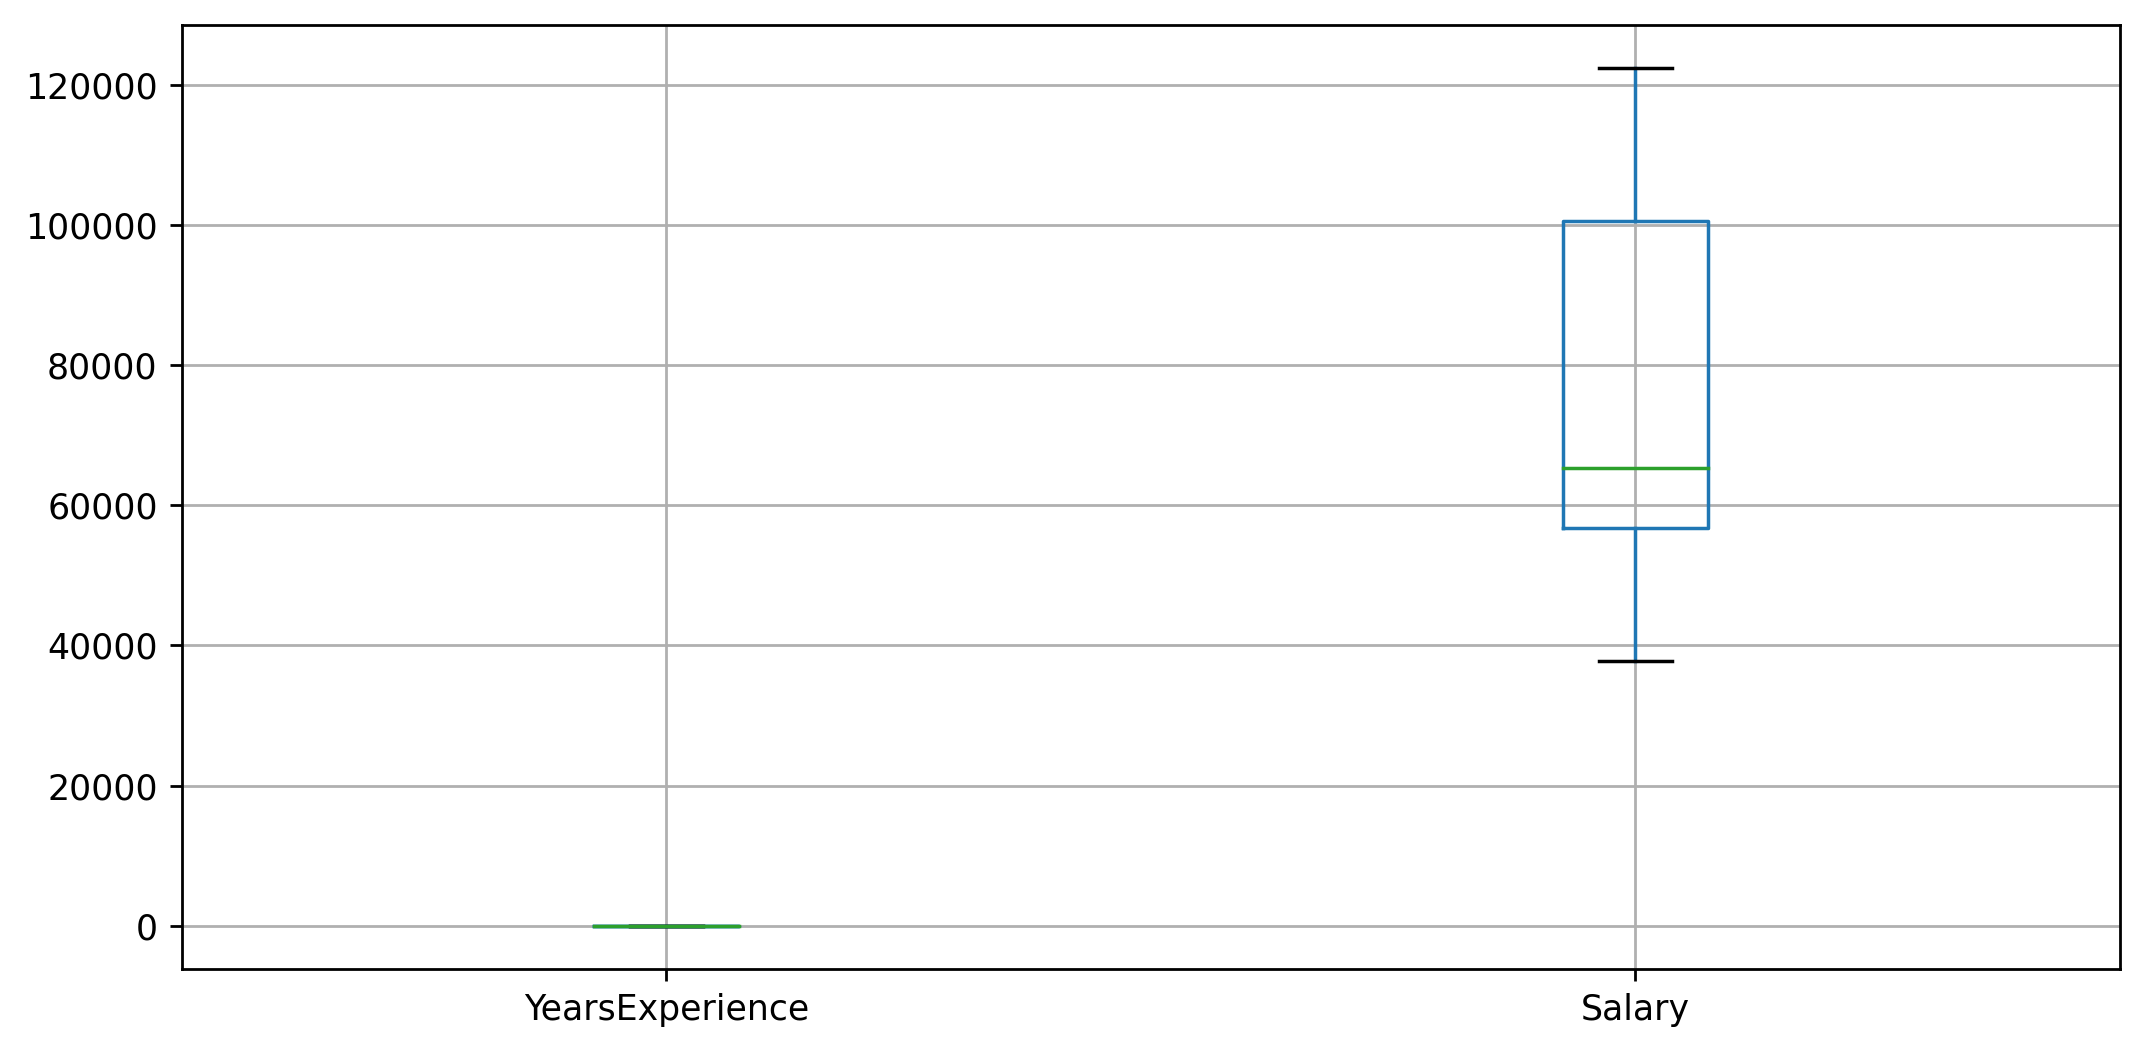

In [36]:
df1.boxplot()

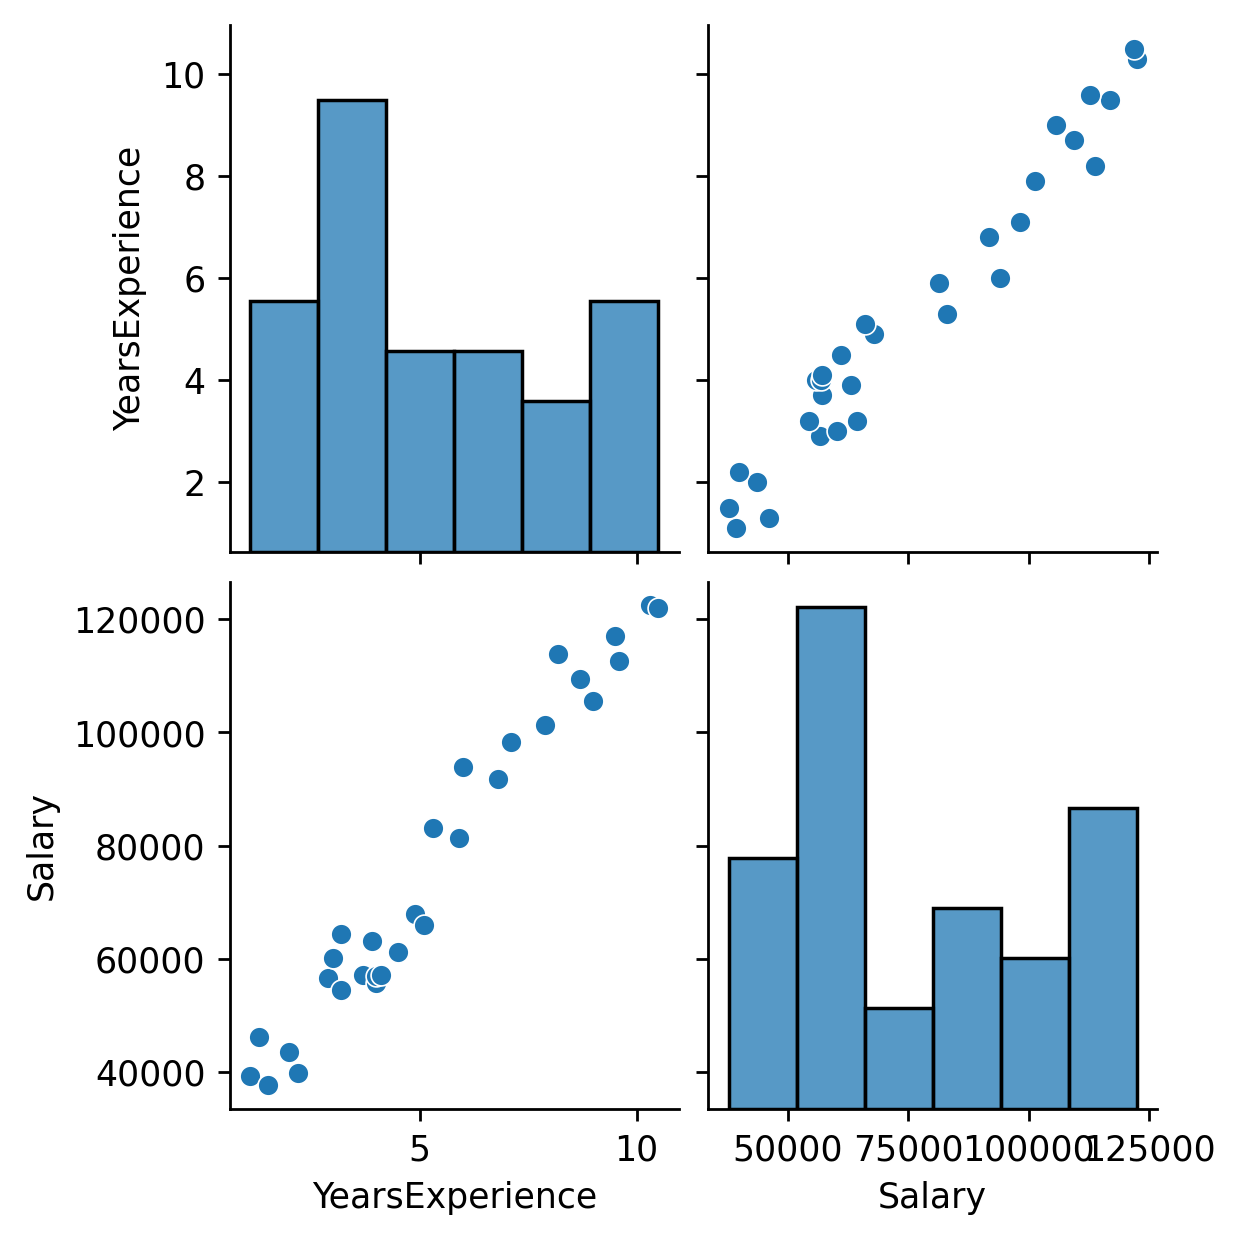

In [37]:
sns.pairplot(df1)

<AxesSubplot:>

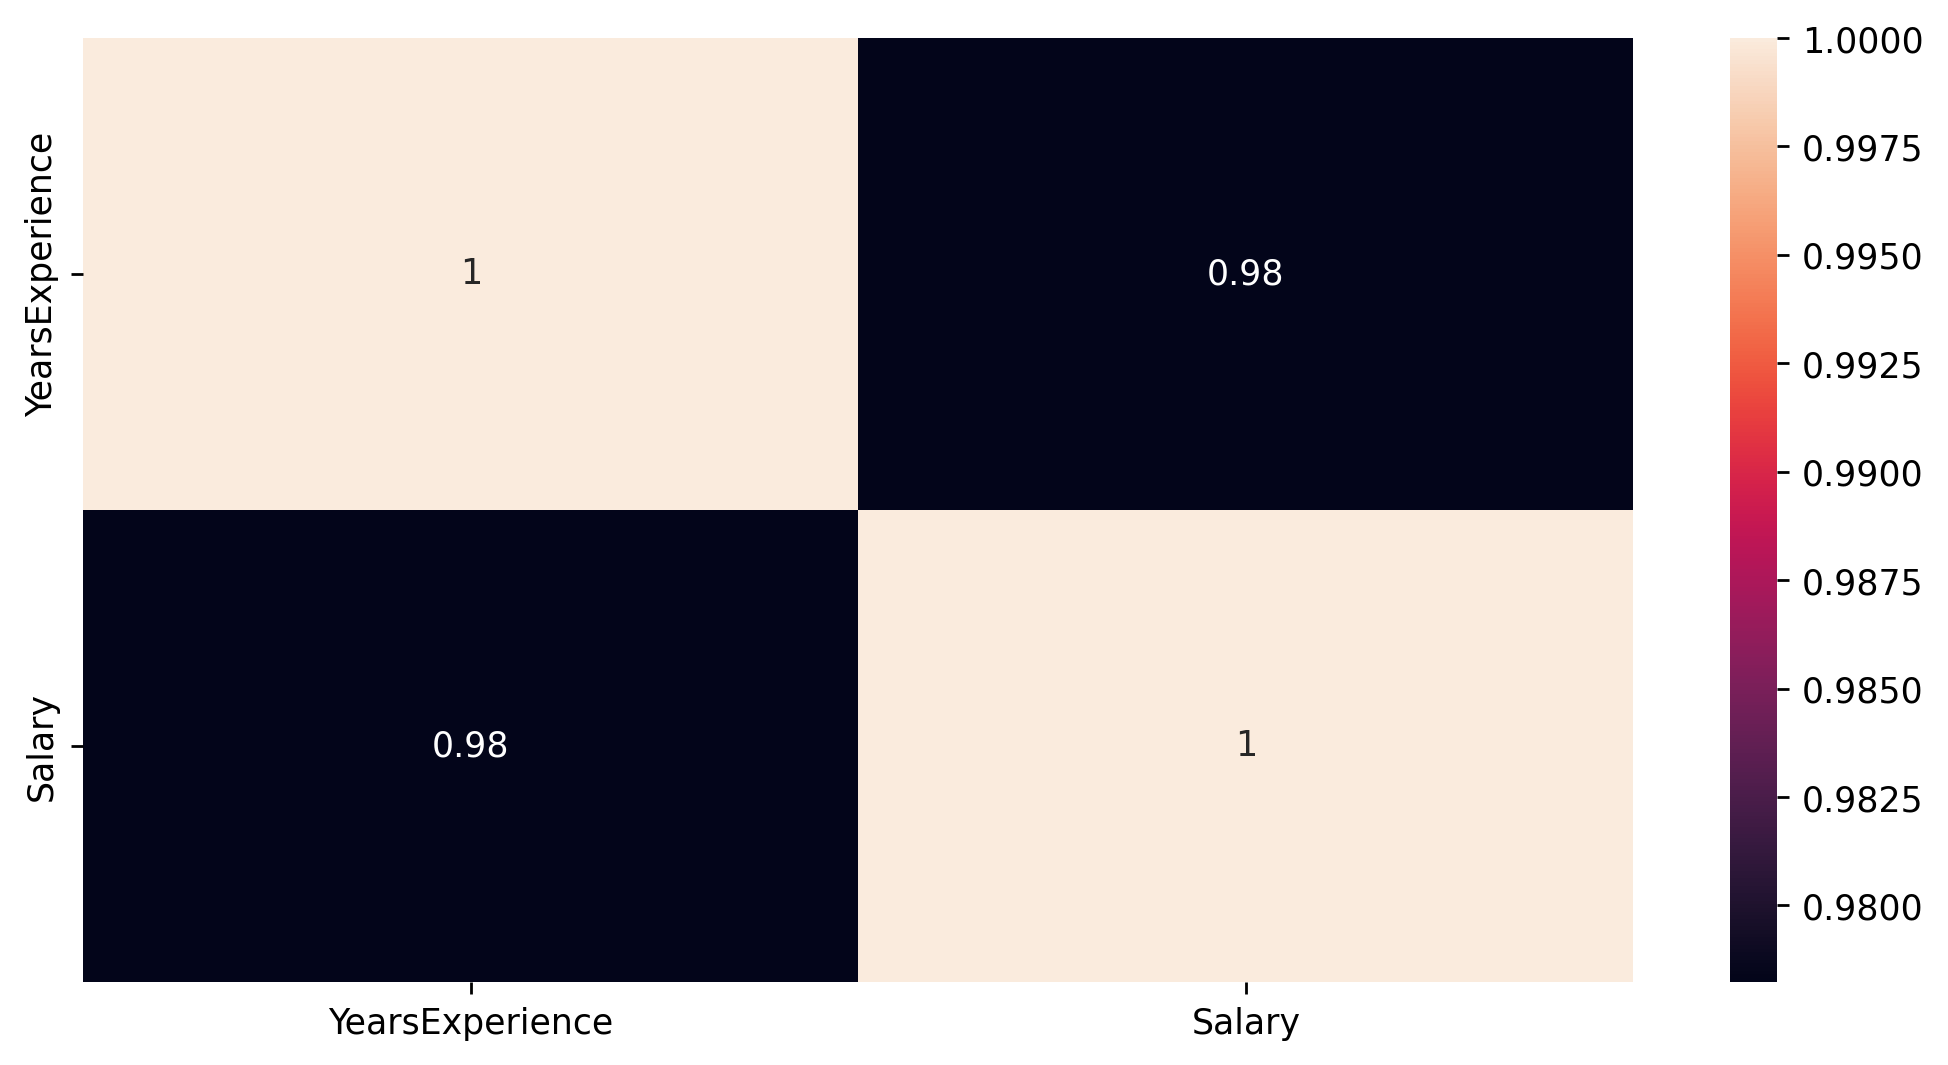

In [38]:
sns.heatmap(df1.corr(), annot = True)

In [39]:
df1["log_Salary"] = np.log(df1["Salary"])
df1["log_YearsExperience"] = np.log(df1["YearsExperience"])

<AxesSubplot:xlabel='log_YearsExperience', ylabel='Density'>

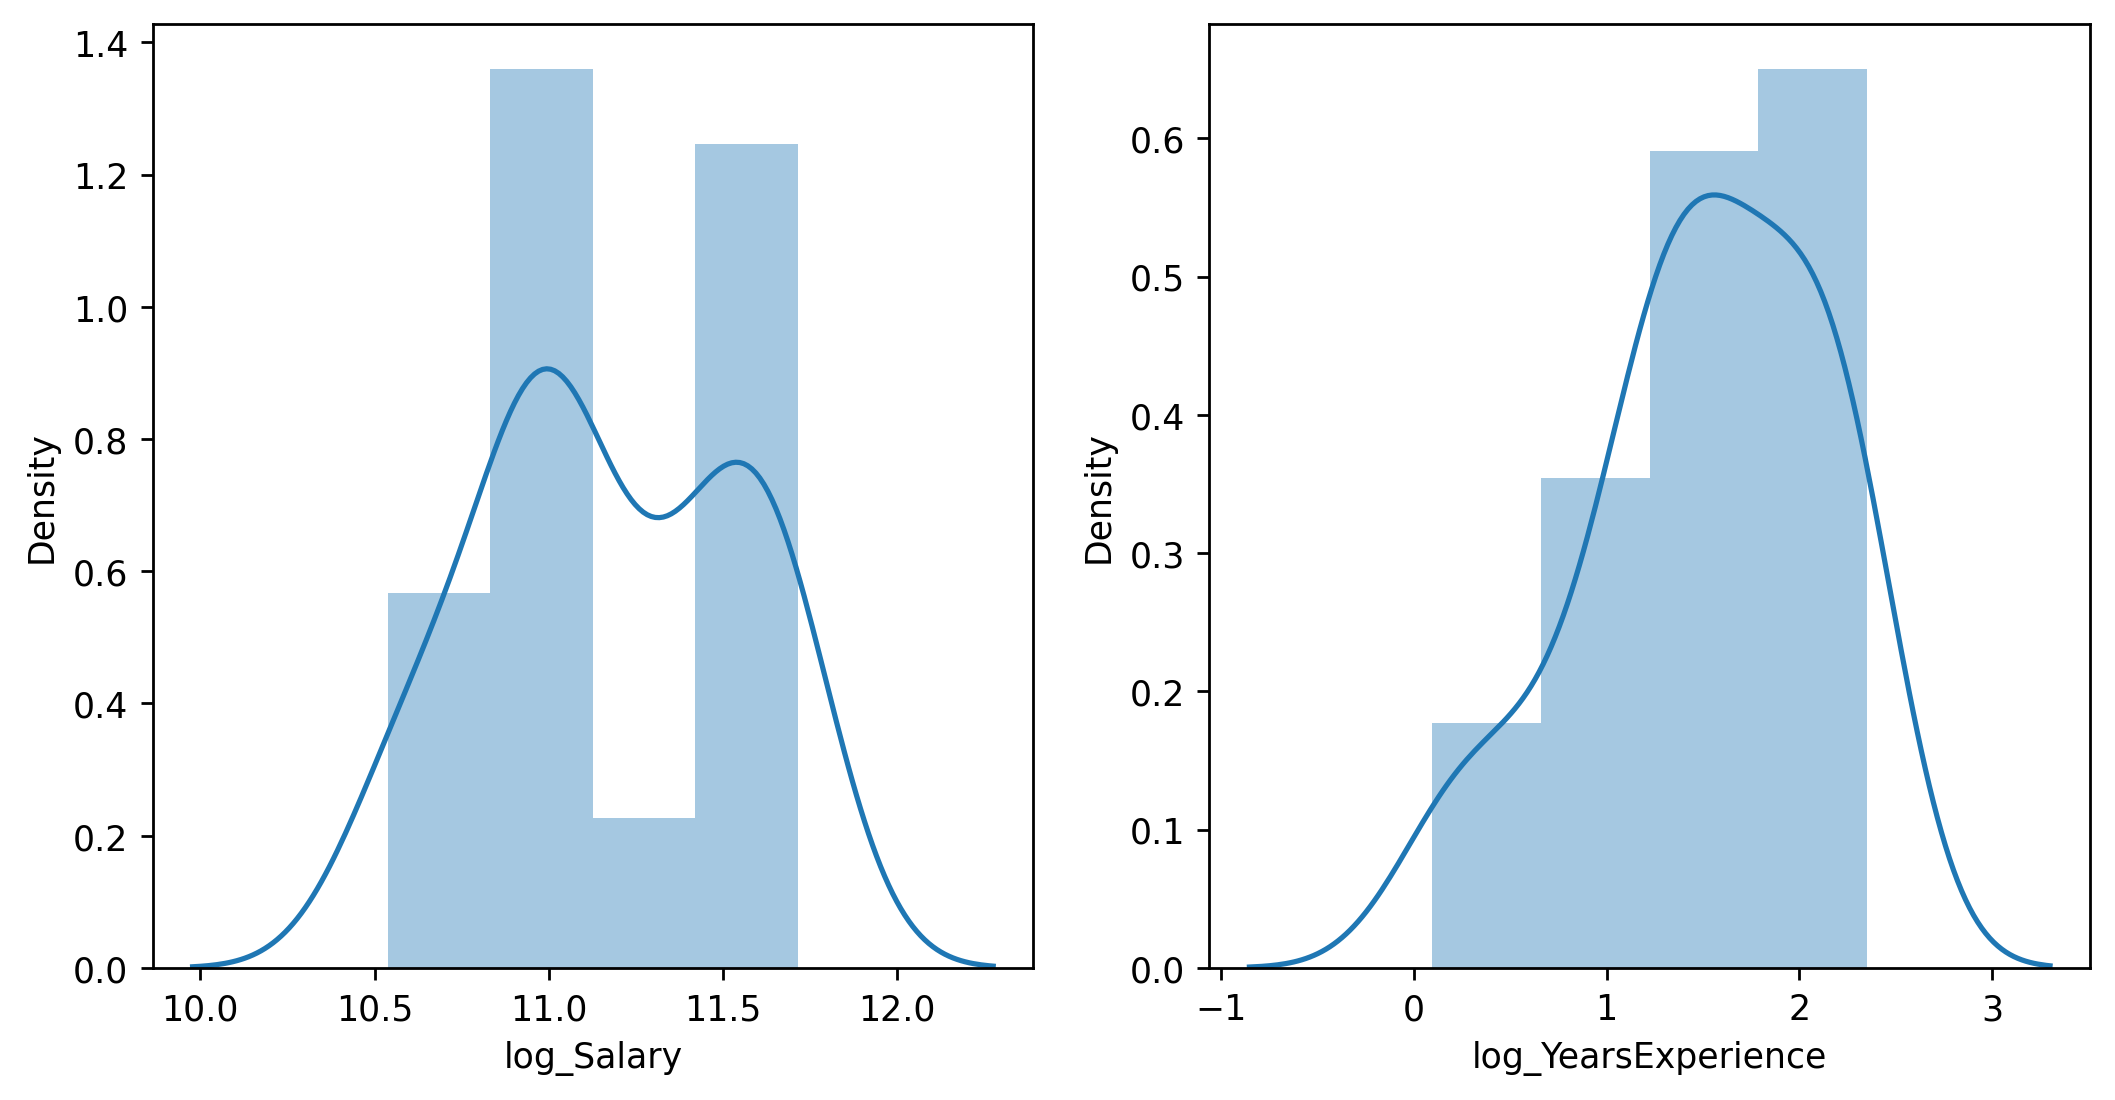

In [40]:
plt.subplot(1,2,1)
sns.distplot(df1["log_Salary"])

plt.subplot(1,2,2)
sns.distplot(df1["log_YearsExperience"])

In [42]:
df1["sqrt_Salary"] = np.sqrt(df1["Salary"])
df1["sqrt_YearsExperience"] = np.sqrt(df1["YearsExperience"])

<AxesSubplot:xlabel='sqrt_YearsExperience', ylabel='Density'>

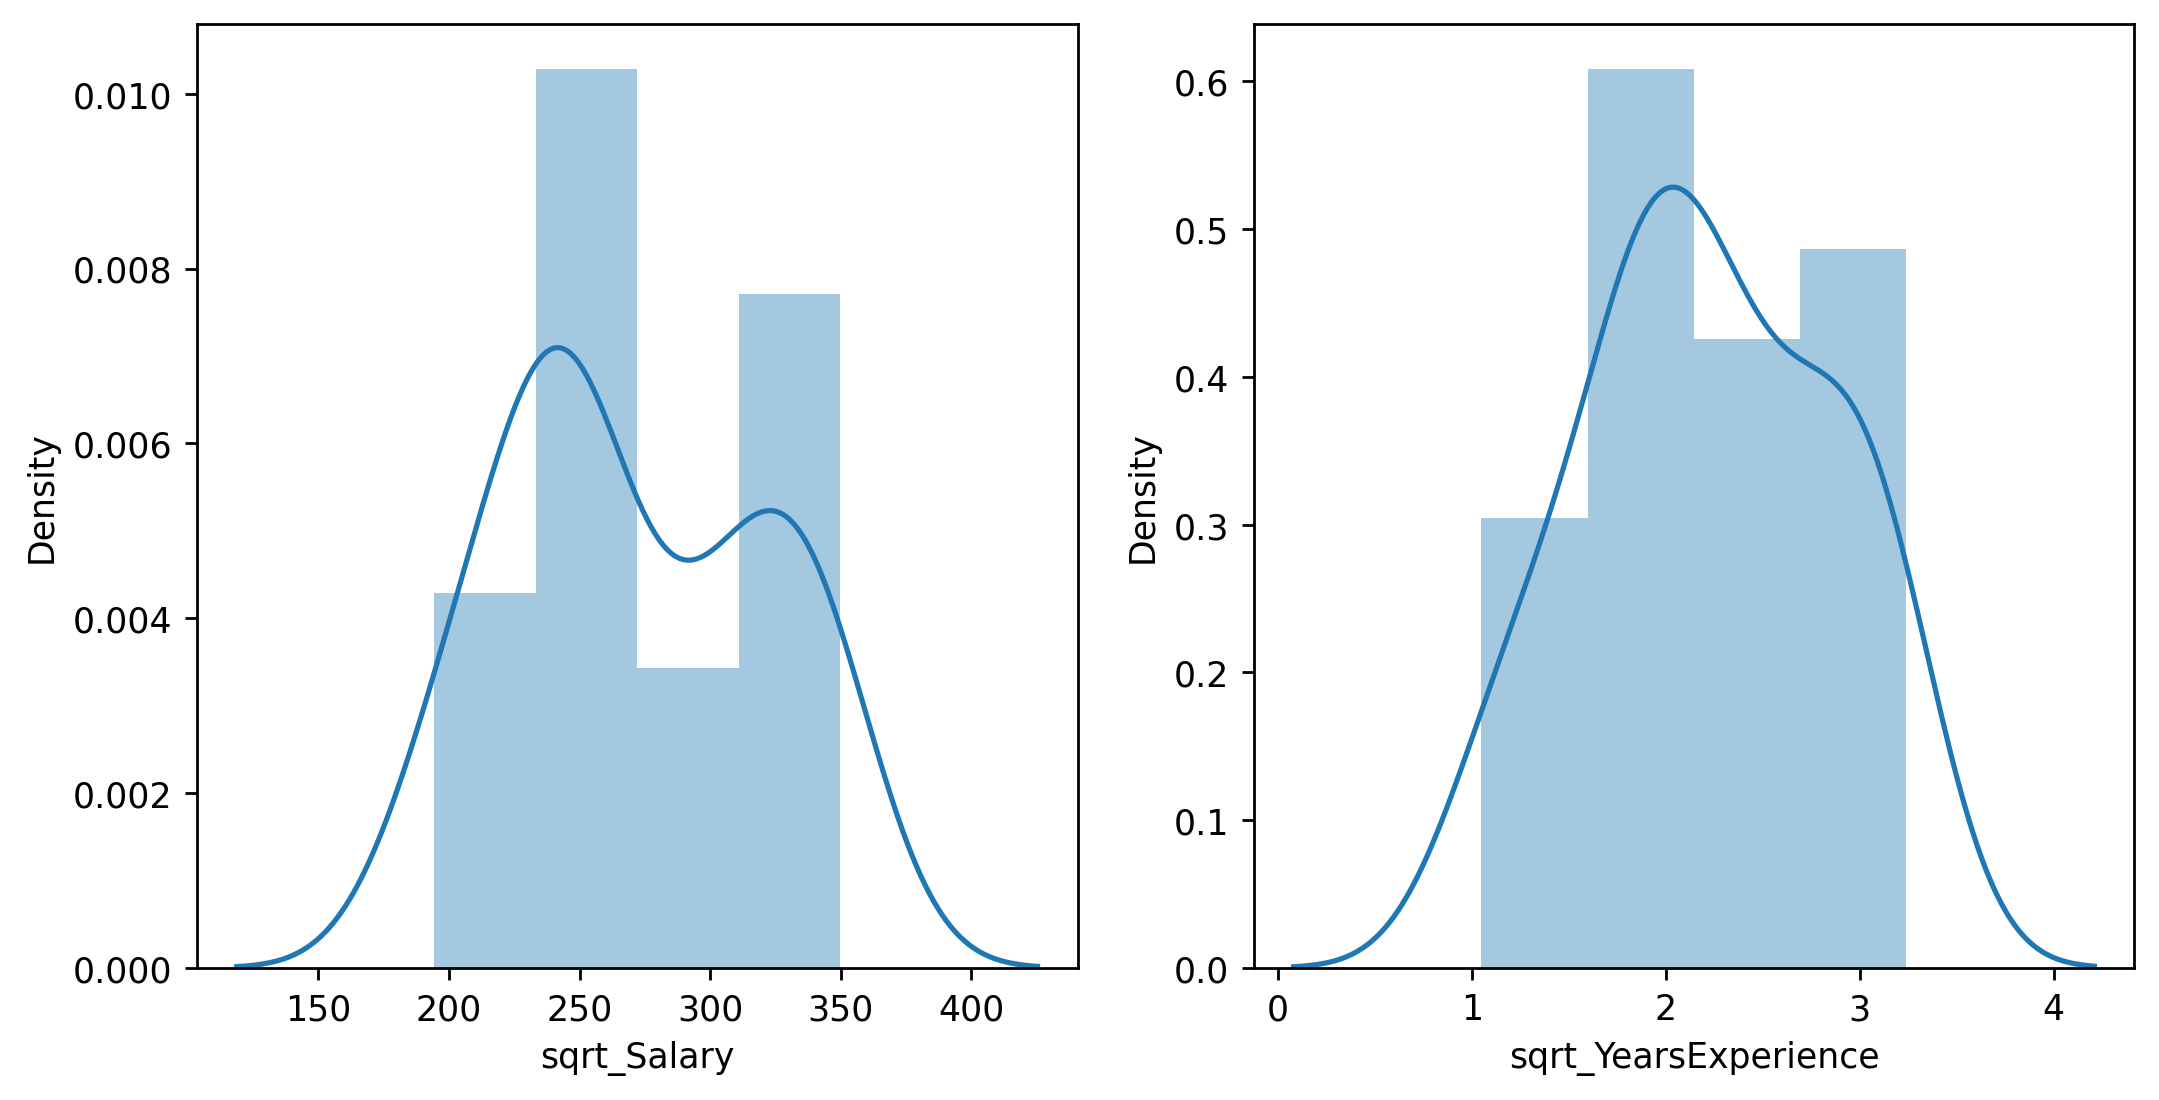

In [44]:
plt.subplot(1,2,1)
sns.distplot(df1["sqrt_Salary"])

plt.subplot(1,2,2)
sns.distplot(df1["sqrt_YearsExperience"])

In [45]:
import statsmodels.formula.api as smf

In [46]:
model = smf.ols('Salary~YearsExperience',data=df1).fit()
model

In [47]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [48]:
model.rsquared, model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [50]:
log_model = smf.ols("log_Salary~log_YearsExperience",data = df1).fit()

In [51]:
log_model.params

Intercept              10.328043
log_YearsExperience     0.562089
dtype: float64

In [52]:
log_model.rsquared, log_model.rsquared_adj

(0.905215072581715, 0.9018298966024905)

In [54]:
sqrt_model = smf.ols("sqrt_Salary~sqrt_YearsExperience",data = df1).fit()

In [55]:
sqrt_model.params

Intercept               103.568031
sqrt_YearsExperience     75.626932
dtype: float64

In [56]:
sqrt_model.rsquared, sqrt_model.rsquared_adj

(0.9419490138976825, 0.9398757643940283)